In [1]:
import torch 
import numpy as np
import pandas as pd

# 1

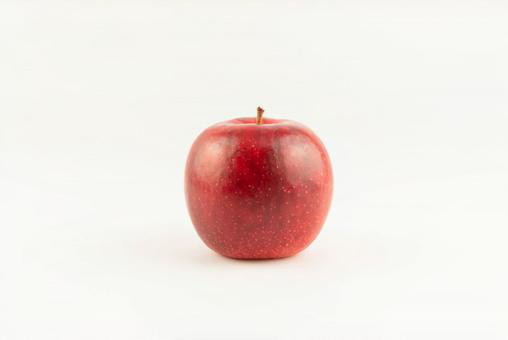

In [2]:
from PIL import Image

img1 = Image.open('data/apple.jpeg')
img1

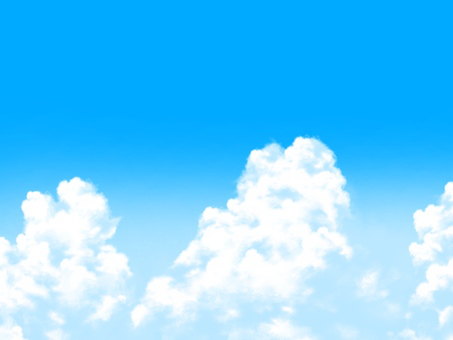

In [3]:
img2 = Image.open('data/sky.jpeg')
img2

In [4]:
import imageio

img1_arr = imageio.imread('data/apple.jpeg')
img1_arr.shape

(340, 508, 3)

In [5]:
img2_arr = imageio.imread('data/sky.jpeg')
img2_arr.shape

(340, 453, 3)

In [6]:
img1 = torch.from_numpy(img1_arr)
img1 = img1.permute(2, 0, 1)
img1 = img1.float()
img1.shape

torch.Size([3, 340, 508])

In [7]:
img2 = torch.from_numpy(img2_arr)
img2 = img2.permute(2, 0, 1)
img2 = img2.float()
img2.shape

torch.Size([3, 340, 453])

### 画像の明るさ

In [8]:
print(f'apple: {img1.mean()}')
print(f'sky:{img2.mean()}')

apple: 232.3137969970703
sky:188.04100036621094


In [9]:
img1.mean(dim=1).mean(dim=1)

tensor([240.9035, 230.4260, 225.6119])

In [10]:
img2.mean(dim=1).mean(dim=1)

tensor([104.9854, 204.6515, 254.4860])

# 2

In [11]:
with open('dataloader_image_classification.py') as f:
    text = f.read()

In [12]:
# 正規表現で抽出
import re 
words_in_file = re.findall(r'[a-zA-Z0-9_]+', text)
# print(words_in_file)

In [13]:
word_list = list(set(words_in_file))
word_list = sorted(word_list)

In [14]:
word2index_dict = {word: i for i, word in enumerate(word_list)}
len(word2index_dict)

90

### one-hot encoding

In [15]:
word_t = torch.zeros(len(words_in_file), len(word2index_dict))
for i, word in enumerate(words_in_file):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1

In [16]:
word_onehot_t = torch.zeros(word_t.shape[0], word_t.shape[1])

In [17]:
index_in_file_t = torch.zeros(len(words_in_file))

In [18]:
for i, word in enumerate(words_in_file):
    word_inex = word2index_dict[word]
    index_in_file_t[i] = torch.tensor(word_index)
    
index_in_file_t = index_in_file_t.long()

In [19]:
word_onehot_t.scatter_(
    dim=1, 
    index=index_in_file_t.unsqueeze(1),
    value=1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [21]:
print(word_onehot_t[0])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
